In [ ]:
# import library
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import os
from tqdm.auto import tqdm
import shutil

In [ ]:
# Create the .kaggle directory
!mkdir -p ~/.kaggle
# Move kaggle.json to the .kaggle directory
!mv "/content/kaggle (1).json" ~/.kaggle/kaggle.json
# Set the correct file permissions
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# downloading the dataset from kaggle
! kaggle competitions download -c dogs-vs-cats

 99% 802M/812M [00:08<00:00, 148MB/s]
100% 812M/812M [00:08<00:00, 106MB/s]


In [ ]:
# unzip the folder
!unzip -q dogs-vs-cats.zip
!unzip -q train.zip

In [ ]:
# create master and category folder
os.mkdir('images')
os.mkdir("images/dog")
os.mkdir("images/cat")
os.mkdir("test")

In [ ]:
# creating directories for training and validation sets
source = "train/"
dest_cat = "images/cat/"
dest_dog = "images/dog/"

for imageName in tqdm(os.listdir(source)):
  if imageName.startswith("dog"):
    shutil.copy(source+imageName,dest_dog)
  elif imageName.startswith("cat"):
    shutil.copy(source+imageName,dest_cat)

  0%|          | 0/25000 [00:00<?, ?it/s]

In [ ]:
len(os.listdir(dest_dog)),len(os.listdir(dest_cat))

(12500, 12500)

In [ ]:
# Test Data set
test_dog = np.random.choice(os.listdir(dest_dog),size=1000,replace=False)
test_cat = np.random.choice(os.listdir(dest_cat),size=1000,replace=False)

for imageName in test_dog:
  shutil.move(dest_dog+imageName,"test")

for imageName in test_cat:
  shutil.move(dest_cat+imageName,"test")

In [ ]:
len(os.listdir(dest_dog)),len(os.listdir(dest_cat))

(11500, 11500)

In [ ]:
len(os.listdir("test"))

2000

In [ ]:
# Augmentation for training set
idg = ImageDataGenerator(
    horizontal_flip =True,
    rotation_range = 30,
    rescale = 1/255.0,
    zoom_range = 0.2,
    validation_split =0.1,
    fill_mode ='nearest'
)

In [ ]:
batch_size = 64

In [ ]:
# load images from directories
train_idg = idg.flow_from_directory("images",target_size=(150,150),batch_size=batch_size,subset="training")
val_idg = idg.flow_from_directory("images",target_size=(150,150),batch_size=batch_size,subset="validation")

Found 20700 images belonging to 2 classes.
Found 2300 images belonging to 2 classes.


In [ ]:
# Modelling
model = tf.keras.models.Sequential()
# Input layer
model.add(tf.keras.layers.Input((150,150,3), name="input"))
# First Conv2D Layrer
model.add(tf.keras.layers.Conv2D(16,kernel_size=(3,3),padding='valid',strides=(1,1),activation="relu",name='Conv1'))
# First Maxpooling Layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid',name='Pool1'))
# Second Conv2D Layer
model.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),padding='valid',strides=(1,1),activation="relu",name='Conv2'))
# Second Maxpooling Layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid',name='Pool2'))
# Third Conv2D Layer
model.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3),padding='valid',strides=(1,1),activation='relu',name='Conv3'))
# Third Maxpooling Layer
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=(2,2),padding="valid",name="Pool3"))

model.add(tf.keras.layers.Flatten(name="Flat"))
model.add(tf.keras.layers.Dense(64,activation='relu',name="Dense1"))
model.add(tf.keras.layers.Dense(2,activation='softmax',name='Output'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ Conv1 (Conv2D)                       │ (None, 148, 148, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool1 (MaxPooling2D)                 │ (None, 74, 74, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv2 (Conv2D)                       │ (None, 72, 72, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool2 (MaxPooling2D)                 │ (None, 36, 36, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Conv3 (Conv2D)                       │ (None, 34, 34, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Pool3 (MaxPooling2D)                 │ (None, 17, 17, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Flat (Flatten)                       │ (None, 9248)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Dense1 (Dense)                       │ (None, 64)                  │         591,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ Output (Dense)                       │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 606,402 (2.31 MB)

 Trainable params: 606,402 (2.31 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(),loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [ ]:
history = model.fit(train_idg,epochs=15,batch_size=batch_size,validation_data=val_idg)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


324/324 ━━━━━━━━━━━━━━━━━━━━ 169s 491ms/step - accuracy: 0.5341 - loss: 0.6900 - val_accuracy: 0.5791 - val_loss: 0.6714
Epoch 2/15
324/324 ━━━━━━━━━━━━━━━━━━━━ 147s 448ms/step - accuracy: 0.5875 - loss: 0.6690 - val_accuracy: 0.5457 - val_loss: 0.6801
Epoch 3/15
324/324 ━━━━━━━━━━━━━━━━━━━━ 204s 448ms/step - accuracy: 0.6062 - loss: 0.6528 - val_accuracy: 0.6330 - val_loss: 0.6320
Epoch 4/15
324/324 ━━━━━━━━━━━━━━━━━━━━ 201s 450ms/step - accuracy: 0.6297 - loss: 0.6392 - val_accuracy: 0.6526 - val_loss: 0.6180
Epoch 5/15
324/324 ━━━━━━━━━━━━━━━━━━━━ 202s 446ms/step - accuracy: 0.6536 - loss: 0.6207 - val_accuracy: 0.6817 - val_loss: 0.5956
Epoch 6/15
324/324 ━━━━━━━━━━━━━━━━━━━━ 154s 470ms/step - accuracy: 0.6803 - loss: 0.5946 - val_accuracy: 0.6930 - val_loss: 0.5819
Epoch 7/15
324/324 ━━━━━━━━━━━━━━━━━━━━ 198s 452ms/step - accuracy: 0.6952 - loss: 0.5754 - val_accuracy: 0.7087 - val_loss: 0.5673
Epoch 8/15
324/324 ━━━━━━━━━━━━━━━━━━━━ 145s 441ms/step - accuracy: 0.7056 - loss: 0.56

In [ ]:
# Accessing training metrics from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(15)

<function matplotlib.pyplot.show(close=None, block=None)>

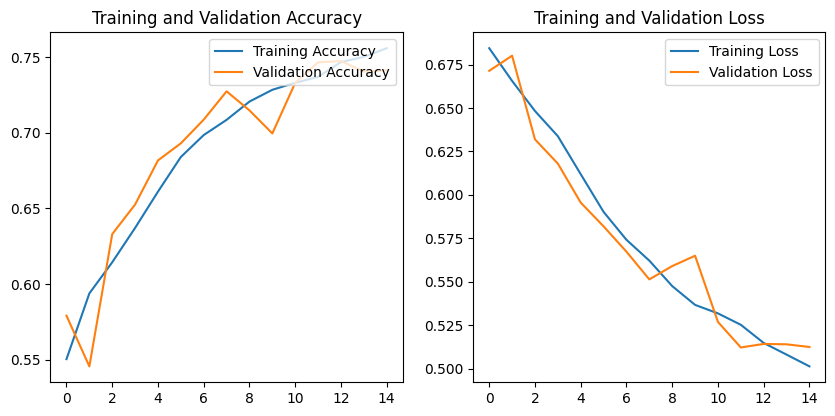

In [ ]:
# Plot training and validation accuracy and loss over epochs
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(epochs,acc,label="Training Accuracy")
plt.plot(epochs,val_acc,label="Validation Accuracy")
plt.legend(loc='upper right')
plt.title("Training and Validation Accuracy")

plt.subplot(2,2,2)
plt.plot(epochs,loss,label="Training Loss")
plt.plot(epochs,val_loss,label="Validation Loss")
plt.legend(loc='upper right')
plt.title("Training and Validation Loss")
plt.show


In [ ]:
# save the model
model.save("cats_and_dogs_model.h5")
new_model = tf.keras.models.load_model("cats_and_dogs_model.h5")

In [ ]:
def predict_image(image_path, model):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    # Make the prediction
    prediction = model.predict(img_array)
    # Extract the confidence score
    confidence = prediction[0][0]
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    if confidence < 0.5:
        print(f"Prediction: Cat with {1 - confidence:.2f} confidence")
    else:
        print(f"Prediction: Dog with {confidence:.2f} confidence")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


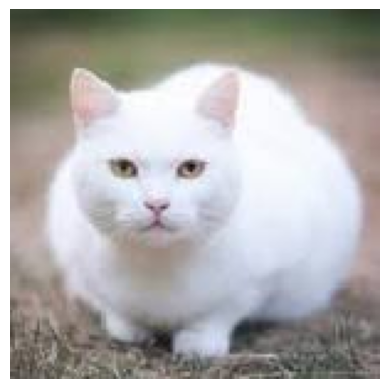

Prediction: Cat with 0.76 confidence


In [ ]:
image_path = "/content/download (14).jpg"
predict_image(image_path,new_model)